### **Regressão Linear**

## Instalando Bibliotecas

In [1]:
!pip install pandas
!pip install numpy
!pip install yfinance

## Instalando Pacotes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import os
from datetime import datetime
from datetime import timedelta
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
#definção do período de 2 anos - De Janeiro de 2022 a Janeiro de 2024
data_inicial = "2022-01-01"
data_final = "2024-01-01"
yf.pdr_override()
IBOV = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)
#obtendo dados do Índice Ibovespa no Yahoo Finance, sob o código ^BVSP
#pdr.get_data_yahoo é uma função no módulo pandas_datareader que permite baixar dados históricos no Yahoo Finance

[*********************100%%**********************]  1 of 1 completed


In [4]:
IBOV
#IBOV == DataFrame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500
2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600
2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0
2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200
...,...,...,...,...,...,...
2023-12-21,130826.0,132277.0,130822.0,132182.0,132182.0,8681000
2023-12-22,132553.0,133035.0,132094.0,132753.0,132753.0,8231100
2023-12-26,132753.0,133645.0,132753.0,133533.0,133533.0,0


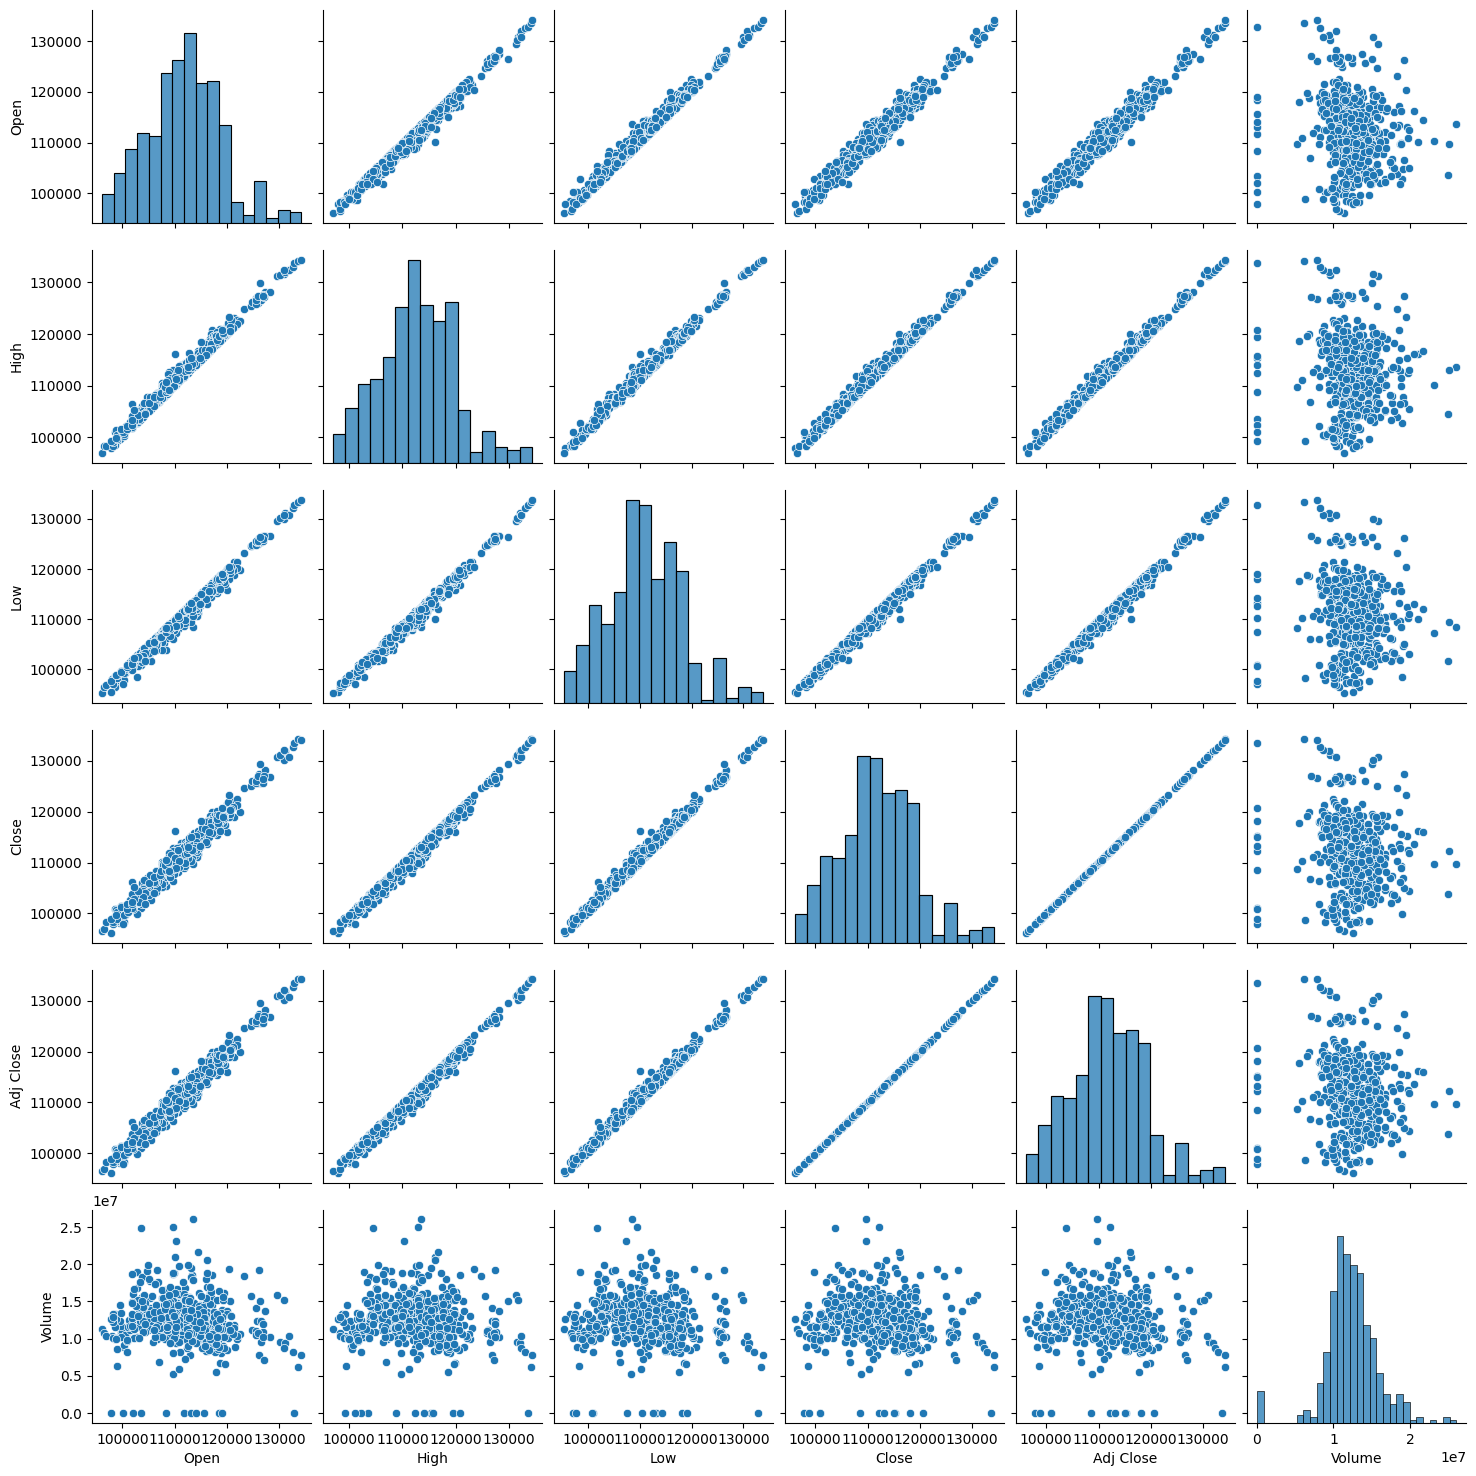

In [5]:
#pairplot: função da biblioteca seaborn para traçar múltiplas distribuições. Para criar uma grade de cada variável entre os eixos x e y
sns.pairplot(IBOV)

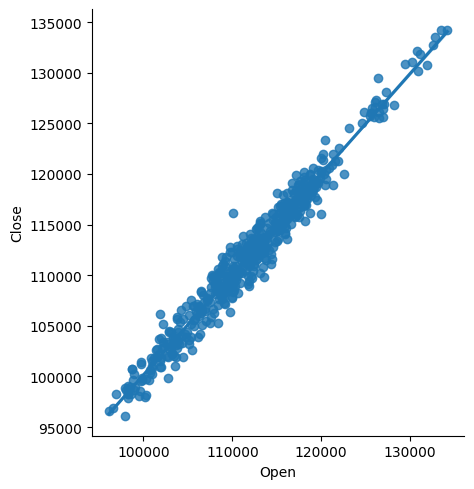

In [6]:
#lmplot: função da biblioteca seaborn que nos permite plotar um subconjunto (de um conjunto de dados)
sns.lmplot(x='Open', y='Close', data=IBOV)

In [7]:
abertura = IBOV[['Open']]
fechamento = IBOV['Close']
#R quadrado (também conhecido como o coeficiente de determinação).
#Varia entre 0 e 1. Quanto mais próximo de 1 mais forte a correlação entre as variáveis
x2 = sm.add_constant(abertura)
estatistica = sm.OLS(fechamento, x2).fit()
print(estatistica.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.429e+04
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:17:46   Log-Likelihood:                -4286.2
No. Observations:                 498   AIC:                             8576.
Df Residuals:                     496   BIC:                             8585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        969.6216    929.782      1.043      0.2

In [8]:
y = IBOV['Close']
print(y)

Date
2022-01-03    103922.0
2022-01-04    103514.0
2022-01-05    101006.0
2022-01-06    101561.0
2022-01-07    102719.0
                ...   
2023-12-21    132182.0
2023-12-22    132753.0
2023-12-26    133533.0
2023-12-27    134194.0
2023-12-28    134185.0
Name: Close, Length: 498, dtype: float64


In [9]:
#dados para Treino
x = IBOV[['Open','High','Low']]
print(x)

                Open      High       Low
Date                                    
2022-01-03  104823.0  106125.0  103413.0
2022-01-04  103922.0  104276.0  103096.0
2022-01-05  103514.0  103514.0  100850.0
2022-01-06  101006.0  102235.0  101000.0
2022-01-07  101561.0  102719.0  101104.0
...              ...       ...       ...
2023-12-21  130826.0  132277.0  130822.0
2023-12-22  132553.0  133035.0  132094.0
2023-12-26  132753.0  133645.0  132753.0
2023-12-27  133523.0  134195.0  133328.0
2023-12-28  134194.0  134392.0  133832.0

[498 rows x 3 columns]


### **Treinamento**

In [10]:
#base de teste 30%
#base de treinamento de 70%
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)
print("x_train", x_train)
print("y_train", y_train)

x_train                 Open      High       Low
Date                                    
2022-07-26  100270.0  100753.0   99365.0
2023-07-12  117557.0  119156.0  117557.0
2022-07-18   96553.0   98291.0   96553.0
2023-12-19  131088.0  132047.0  131086.0
2022-06-29  100592.0  101313.0   99218.0
...              ...       ...       ...
2023-04-18  106023.0  106475.0  105122.0
2022-10-06  117200.0  118382.0  117144.0
2022-06-22   99678.0  100374.0   98050.0
2022-03-11  113664.0  114627.0  111332.0
2022-09-08  109771.0  110768.0  108619.0

[348 rows x 3 columns]
y_train Date
2022-07-26     99772.0
2023-07-12    117666.0
2022-07-18     96916.0
2023-12-19    131851.0
2022-06-29     99622.0
                ...   
2023-04-18    106163.0
2022-10-06    117561.0
2022-06-22     99522.0
2022-03-11    111713.0
2022-09-08    109916.0
Name: Close, Length: 348, dtype: float64


In [11]:
#LinearRegression: função que realiza regressão linear, para encontrar a melhor relação linear entre uma variável dependente e uma ou mais variáveis independentes.
#A regressão linear pode ser usada para diversos fins, como prever valores futuros, testar hipóteses ou encontrar tendências e padrões em dados.
treinamento = LinearRegression()

In [12]:
#método fit: é uma função que pode ser usado em vários modelos de aprendizado de máquina
#a função pega os dados de treinamento como argumentos e ajusta os parâmetros do modelo para minimizar o erro ou a função de perda
#retorna o modelo treinado
treinamento.fit(x_train, y_train)

LinearRegression()

In [13]:
#Predict (Predição): uma função que também pode ser usada em vários modelos de aprendizado de máquina para fazer previsões com base nos dados de entrada
#o método retorna os valores de saída previstos para os dados de entrada, com base nos dados aprendidos ou treinados obtidos
y_pred = treinamento.predict(x_test)
print(y_pred)

[107293.69383914 109017.55931813 109280.86210655 114388.69608918
 106964.09396919 107130.57900704 101095.96566075 128825.36756629
 111699.38486777 110559.9450286  104527.57608674 106777.31956546
 119345.7926173  105945.99331621 109948.04369595 102945.89331451
 120027.74762988 110172.25334962 112031.42187409 112614.9975154
 113000.05353406 119471.58027419 102809.9045575  108537.11254318
 113360.56847675 115634.33265106 113017.87618716 118692.21633514
 110165.4065016  108998.96225801 117017.64999188  98730.09551959
  98166.35213308 116931.92665475 118134.94414164 115638.96772852
 103570.23113431 116616.2812597  109658.68742551 102807.83413135
 106205.38186112 112336.45068386 118127.73676064 109197.20098008
 109677.68308386 103574.5371324  116123.85779841 122616.32410467
 117976.75257252 111423.36533735 118493.84679868 112237.40366655
 122570.85181534 103626.05303124  98148.3013103  108154.92785671
 103860.9556142  111911.95145855 111705.68006859 109006.15034102
 109664.18077437 107798.75

In [14]:
tam = int(len(y_pred))
print("Tamanho do Treinamento",tam)

Tamanho do Treinamento 150


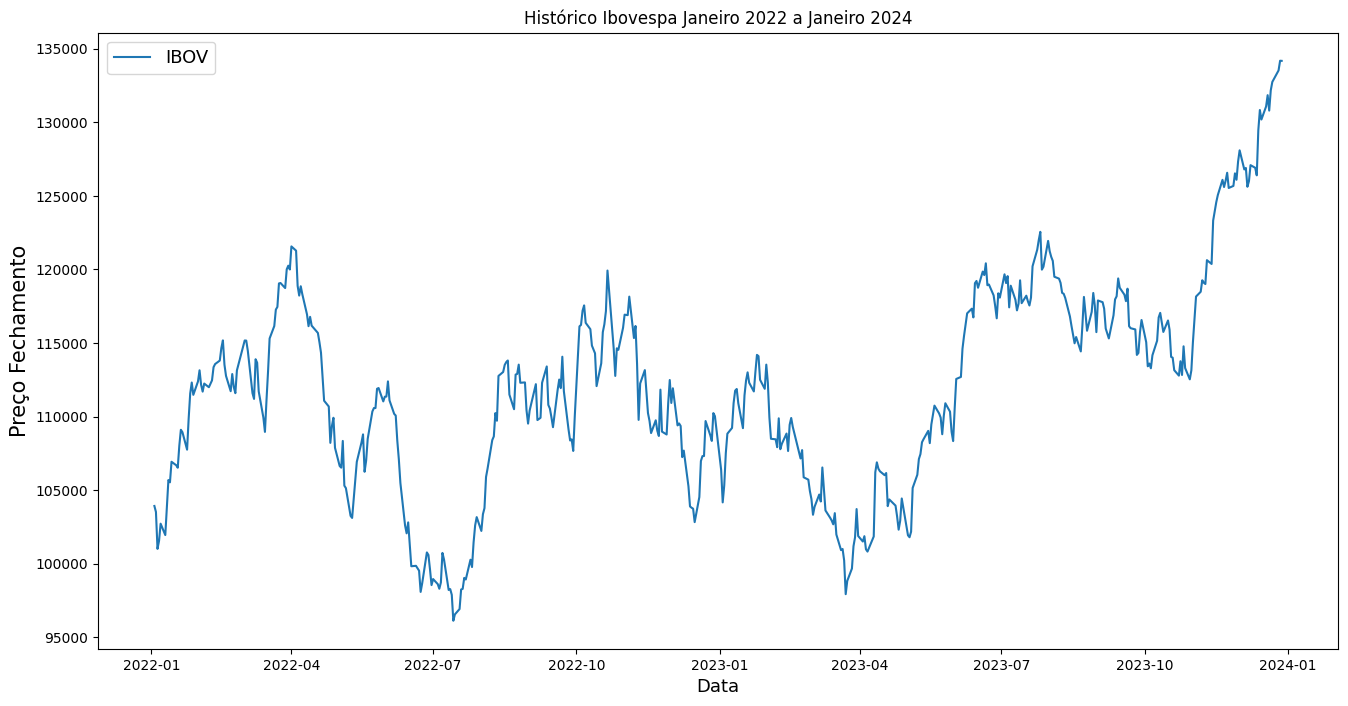

In [15]:
plt.figure(figsize=(16,8))
plt.title('Histórico Ibovespa Janeiro 2022 a Janeiro 2024')
plt.xlabel('Data', fontsize=13)
plt.ylabel("Preço Fechamento", fontsize=15)
plt.plot(IBOV['Close'])
plt.legend(['IBOV'],loc=2, prop={'size':13})
plt.show()

In [16]:
#gerando DataFrame para exibir Predição
df = pd.DataFrame({"Close": IBOV['Close'].iloc[348:498], "y_pred": y_pred.reshape(len(y_pred))})

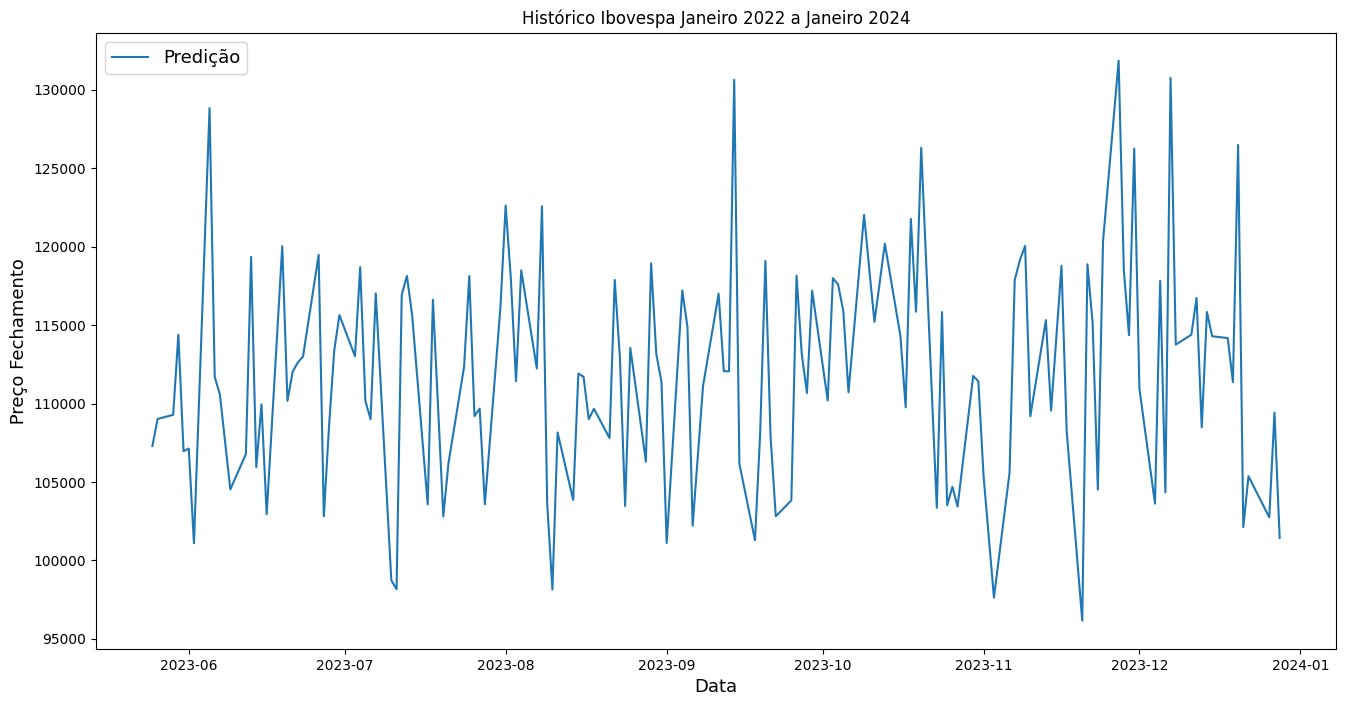

In [17]:
plt.figure(figsize=(16,8))
plt.title('Histórico Ibovespa Janeiro 2022 a Janeiro 2024')
plt.xlabel('Data', fontsize=13)
plt.ylabel(" Preço Fechamento ", fontsize=13)
plt.plot(df[['y_pred']])
plt.legend(['Predição'],loc=2, prop={'size':13})
plt.show()

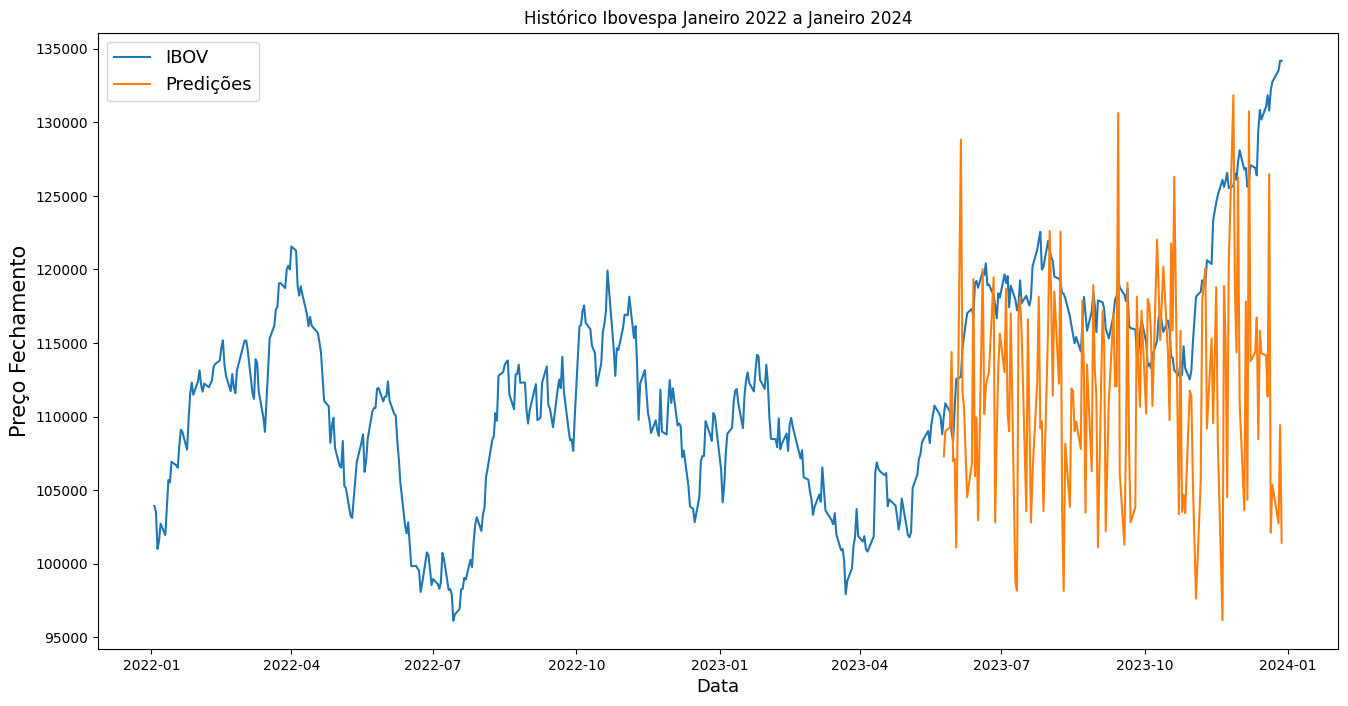

In [18]:
plt.figure(figsize=(16,8))
plt.title('Histórico Ibovespa Janeiro 2022 a Janeiro 2024')
plt.xlabel('Data', fontsize=13)
plt.ylabel("Preço Fechamento", fontsize=15)
plt.plot(IBOV['Close'])
plt.plot(df[['y_pred']])
plt.legend(['IBOV', 'Predições'],loc=2, prop={'size':13})
plt.show()